In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df.drop_duplicates(inplace=True)
df.shape

(18924, 18)

## Engine Volume

In [4]:
def Eng_Vol2(df3):
    turbo = []
    Engine_Volume = []
    for vol in df3["Engine volume"]:
        if len(vol)>4:
            turbo.append(1)
            vol = vol[0:3]
            Engine_Volume.append(float(vol))
        else:
            turbo.append(0)
            Engine_Volume.append(float(vol))
            
    df3.drop(columns = "Engine volume", inplace = True)
    df3["Engine volume"] = Engine_Volume
    df3["Turbo"] = turbo
    return df3 

## Mileage

In [5]:
def mileage(df3):
    mile = []
    for mil in df3["Mileage"]:
        mil = mil[0:-3]
        mile.append(int(mil))

    df3.drop(columns = "Mileage", inplace = True)
    df3["Mileage"] = mile
    return df3

## Drop ID and clean Levy

In [6]:
def drop_ID_n_clean_levy(df3):
    df3.drop(columns = "ID", inplace = True)
    df3["Levy"].replace(to_replace='-', value = np.nan, inplace = True)
    df3["Levy"] = pd.to_numeric(df3["Levy"])
    Levy_median = df3["Levy"].median()
    df3["Levy"].fillna(Levy_median, inplace = True )
    return df3, Levy_median

## Target Encoding

In [7]:
def target_encoding(df3, categ_var):
    df4=df3
    enc_dict = {}
    for var in categ_var:
        encodings = df4.groupby(var)['Price'].median().reset_index()
        df4 = df4.merge(encodings, how='left', on=var)
        df4.drop(var, axis=1, inplace=True)
        df4.rename(columns = {"Price_y": var + "_enc", "Price_x": "Price"}, inplace = True) 
        enc_dict[var] = encodings
    return df4, enc_dict

## One Hot

In [8]:
def OneHot_encoding(df3, categ):
    
    df4 = df3
    dummy = pd.get_dummies(df4[categ])
    df4 = df4.drop(columns = categ, axis=1)
    df4=pd.concat((df4,dummy),axis=1)
        
    return df4

In [9]:
#For Leather Interiors
def LI(df4):
    df4["Leather interior"].replace({"Yes":1, "No":0}, inplace = True)
    return df4

In [10]:
df2 = df[df["Price"]<400000]
df2.shape

(18921, 18)

In [11]:
df2 = Eng_Vol2(df2)
df2 = mileage(df2)
df2, Levy_median = drop_ID_n_clean_levy(df2)
df2.describe()

C:\Ana\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-4-fbbcc2efe004>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Engine volume"] = Engine_Volume
<ipython-input-4-fbbcc2efe004>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Tu

,Price,Levy,Prod. year,Cylinders,Airbags,Engine volume,Turbo,Mileage
count,18921.000000,18921.000000,18921.000000,18921.000000,18921.000000,18921.000000,18921.000000,1.892100e+04
mean,17120.710269,868.444797,2010.913958,4.579885,6.568786,2.305983,0.099942,1.555614e+06
std,18270.028180,391.333491,5.664846,1.199795,4.321958,0.877083,0.299930,4.880607e+07
min,1.000000,87.000000,1939.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5331.000000,730.000000,2009.000000,4.000000,4.000000,1.800000,0.000000,7.022000e+04
50%,13172.000000,781.000000,2012.000000,4.000000,6.000000,2.000000,0.000000,1.264000e+05
75%,22063.000000,917.000000,2015.000000,4.000000,12.000000,2.500000,0.000000,1.891670e+05
max,308906.000000,11714.000000,2020.000000,16.000000,16.000000,20.000000,1.000000,2.147484e+09


<AxesSubplot:>

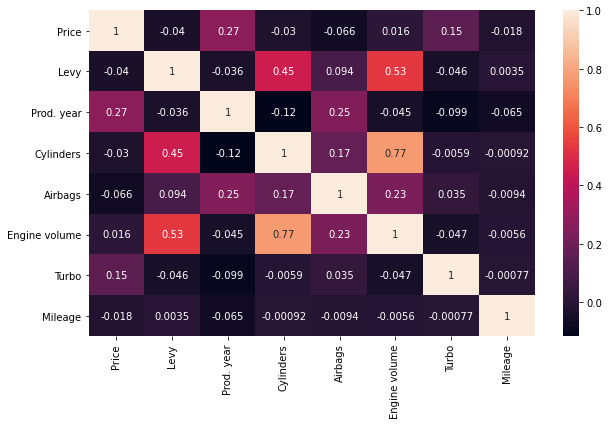

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(), annot = True)

# Graphs

In [139]:
df2.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume,Turbo,Mileage
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,0,186005
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,0,192000
2,8467,779.0,HONDA,FIT,2006,Hatchback,No,Petrol,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1.3,0,200000
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,0,168966
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,0,91901


In [ ]:
df2.describe()

# Important for test set

In [12]:
#df2 = df2[df2["Levy"]<8000]
df2 = df2[df2["Levy"]<6000]
df2 = df2[df2["Levy"]>250]

levy = []
levy_max = df2.Levy.mean() + (3* df2.Levy.std())
#levy_min = df2.Levy.mean()  (3* df2.Levy.std())
for l in df2["Levy"]:
    if l>2000:
        levy.append(levy_max)
    else:
        levy.append(l)
        
df2.drop(columns = "Levy", inplace = True)
df2["Levy"] = levy
df2.shape

(18887, 18)

<AxesSubplot:xlabel='Levy', ylabel='Price'>

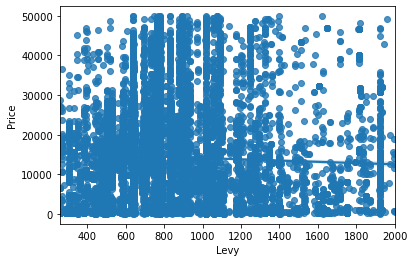

In [139]:
sns.regplot(x = df2["Levy"], y = df2["Price"])

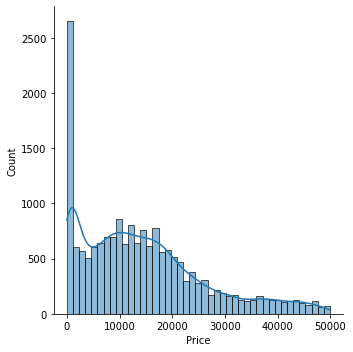

In [140]:
sns.displot(df2["Price"], kde = True)

# Price can be cropped

(1124, 18)

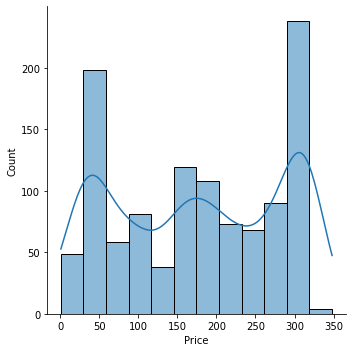

In [38]:
temp = df2[df2["Price"]<350]
sns.displot(temp["Price"], kde = True)
temp.shape

In [40]:
temp.describe()

,Price,Levy,Prod. year,Cylinders,Airbags,Engine volume,Turbo,Mileage
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1.124000e+03
mean,176.609431,935.991103,2010.899466,4.903025,7.003559,2.495996,0.029359,3.076794e+06
std,105.627024,442.442230,6.155281,1.363704,5.250110,1.108324,0.168887,7.208881e+07
min,1.000000,87.000000,1939.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,78.000000,765.000000,2008.750000,4.000000,0.000000,1.600000,0.000000,8.036450e+04
50%,188.000000,779.000000,2012.000000,4.000000,8.000000,2.400000,0.000000,1.494860e+05
75%,282.000000,1058.000000,2014.000000,6.000000,12.000000,3.300000,0.000000,2.203230e+05
max,348.000000,3910.000000,2020.000000,12.000000,16.000000,6.200000,1.000000,2.147484e+09


<AxesSubplot:xlabel='Prod. year', ylabel='Price'>

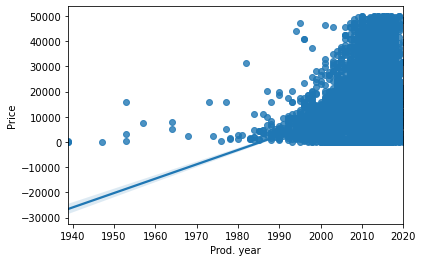

In [41]:
sns.regplot(x = df2["Prod. year"], y = df2["Price"])

(17958, 18)


<AxesSubplot:xlabel='Prod. year', ylabel='Price'>

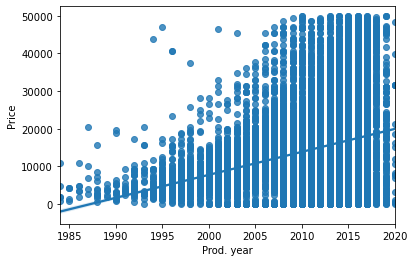

In [141]:
df2 = df2[df2["Prod. year"]>1983]
print(df2.shape)
sns.regplot(x = df2["Prod. year"], y = df2["Price"])

<AxesSubplot:xlabel='Prod. year', ylabel='Price'>

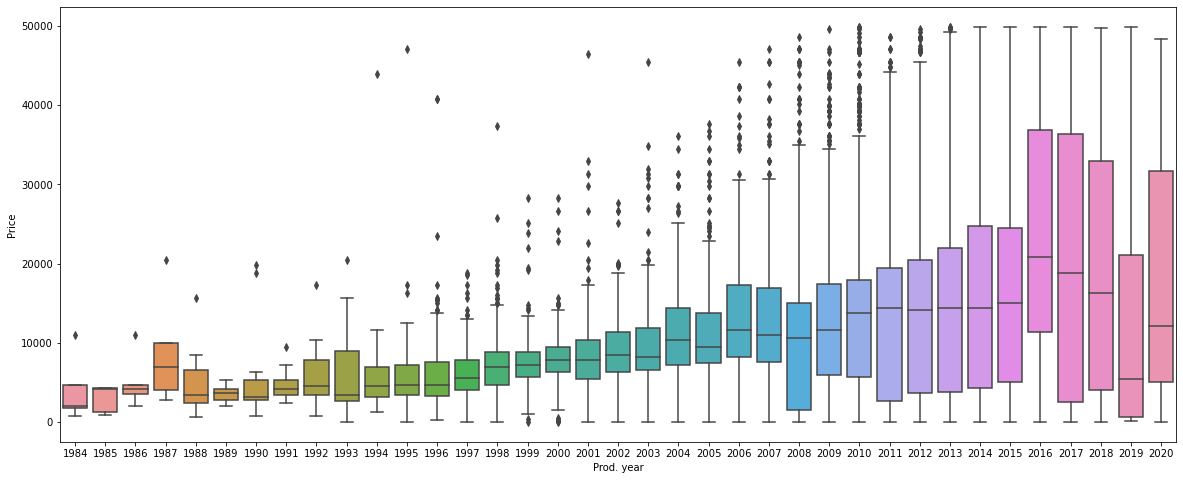

In [43]:
plt.figure(figsize = (20,8))
sns.boxplot(x=df2["Prod. year"], y = df2["Price"])

In [142]:
index_to_drop = df2[(df2["Price"]>30000) & (df2["Prod. year"] < 2003)].index
index_to_drop.shape

(8,)

In [143]:
df2.drop(index = index_to_drop, axis=0, inplace = True)
df2.shape

(17950, 18)

In [144]:
index_to_drop = df2[(df2["Price"]>10000) & (df2["Prod. year"] < 1992)].index
index_to_drop.shape
df2.drop(index = index_to_drop, axis=0, inplace = True)
df2.shape

(17943, 18)

In [145]:
index_to_drop = df2[(df2["Price"]>20000) & (df2["Prod. year"] < 2002)].index
index_to_drop.shape
df2.drop(index = index_to_drop, axis=0, inplace = True)
df2.shape

(17927, 18)

<AxesSubplot:xlabel='Prod. year', ylabel='Price'>

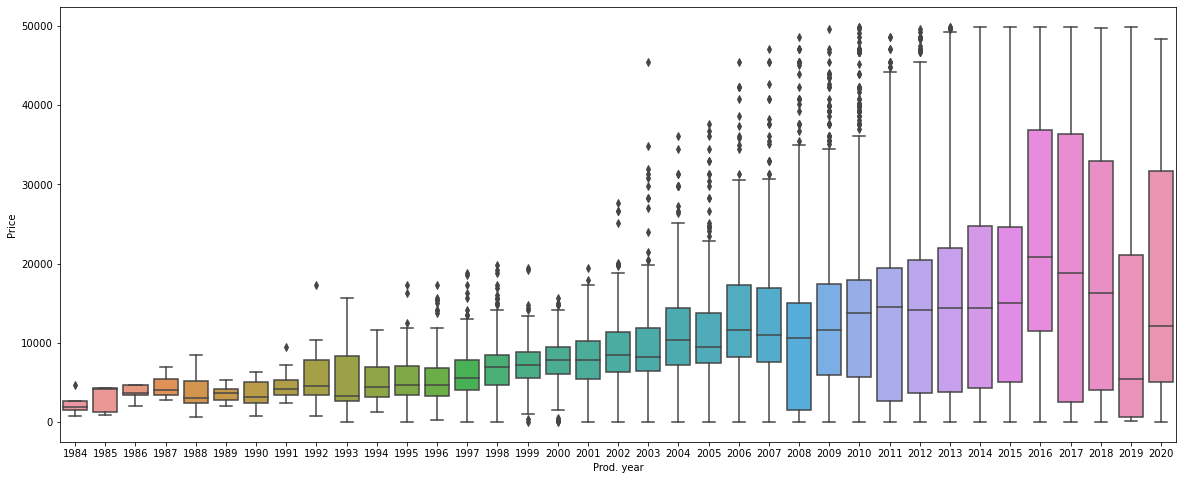

In [146]:
plt.figure(figsize = (20,8))
sns.boxplot(x=df2["Prod. year"], y = df2["Price"])

<AxesSubplot:xlabel='Category', ylabel='Price'>

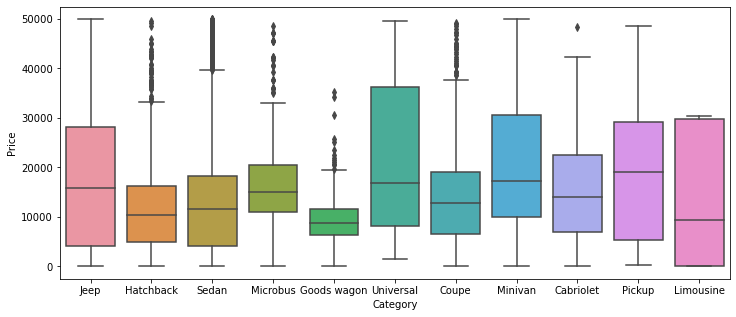

In [147]:
plt.figure(figsize = (12,5))
sns.boxplot(x = df2["Category"], y = df2["Price"])

In [148]:
ind = df2[((((df2["Category"]=="Hatchback")| (df2["Category"]=="Microbus"))&(df2.Price >40000))| ((df2["Category"]=="Goods wagon")&(df2.Price >25000)) | ((df2["Category"]=="Cabriolet") & df2.Price>45000))].index
df2.drop(index = ind, axis = 0,inplace = True)
df2.shape

(17890, 18)

In [149]:
df2.drop(index = df2[(df2["Category"]=="Cabriolet") & (df2["Price"]>45000)].index, inplace= True)

<AxesSubplot:xlabel='Category', ylabel='Price'>

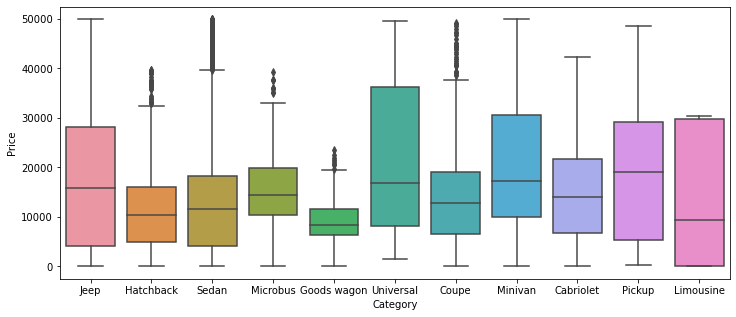

In [150]:
plt.figure(figsize = (12,5))
sns.boxplot(x = df2["Category"], y = df2["Price"])

<AxesSubplot:xlabel='Leather interior', ylabel='Price'>

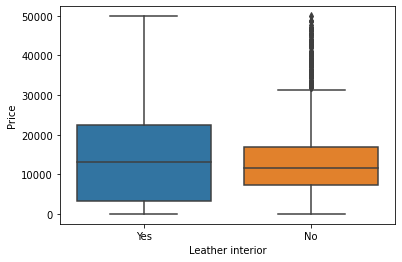

In [151]:
sns.boxplot(x = df2["Leather interior"], y = df2["Price"])

<AxesSubplot:xlabel='Fuel type', ylabel='Price'>

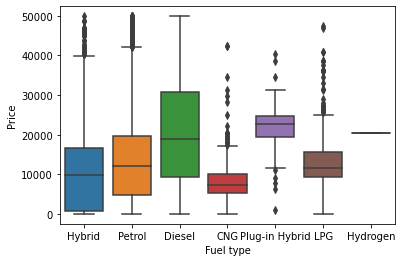

In [152]:
sns.boxplot(x = df2["Fuel type"], y = df2["Price"])

<AxesSubplot:xlabel='Cylinders', ylabel='Price'>

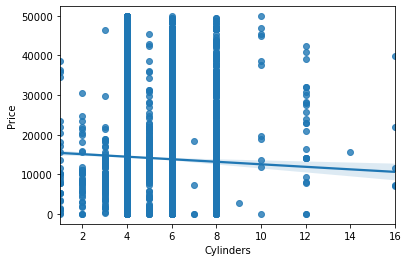

In [153]:
sns.regplot(x = df2["Cylinders"], y=df2["Price"])

# Important step on test set too

In [154]:
#droppping cyliders>12
cyl_median = df2["Cylinders"].median()
cylinders = []
for cyl in df2["Cylinders"]:
    if ((cyl == 7.0) | (cyl==9.0) | (cyl>12.0)):
        cylinders.append(cyl_median)
    else:
        cylinders.append(cyl_median)

df2.drop(columns = "Cylinders", inplace = True)
df2["Cylinders"] = cylinders

In [81]:
df2.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume,Turbo,Mileage,Cylinders
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,0,186005,4.0
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,0,192000,4.0
2,8467,779.0,HONDA,FIT,2006,Hatchback,No,Petrol,Variator,Front,04-May,Right-hand drive,Black,2,1.3,0,200000,4.0
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,Automatic,4x4,04-May,Left wheel,White,0,2.5,0,168966,4.0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,Automatic,Front,04-May,Left wheel,Silver,4,1.3,0,91901,4.0


<AxesSubplot:xlabel='Gear box type', ylabel='Price'>

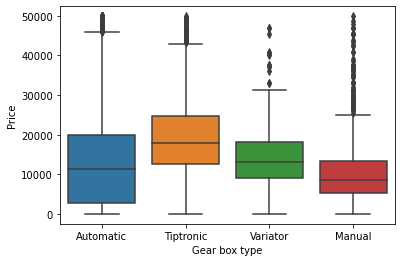

In [82]:
sns.boxplot(x = df2["Gear box type"], y = df2["Price"])

In [83]:
i = df2[(df2["Gear box type"]=="Variator") & (df2["Price"]>=40000)].index
df2.drop(index = i, axis=0, inplace=True)
df2.shape

(17916, 18)

In [234]:
df2["Gear box type"].unique()

array(['Tiptronic', 'Variator', 'Automatic', 'Manual'], dtype=object)

<AxesSubplot:xlabel='Doors', ylabel='Price'>

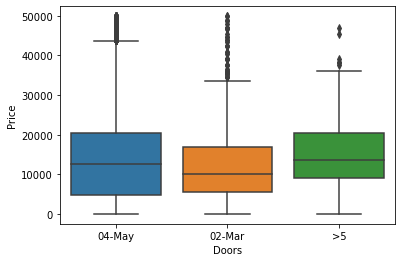

In [84]:
sns.boxplot(x = df2["Doors"], y = df2["Price"])

<AxesSubplot:xlabel='Drive wheels', ylabel='Price'>

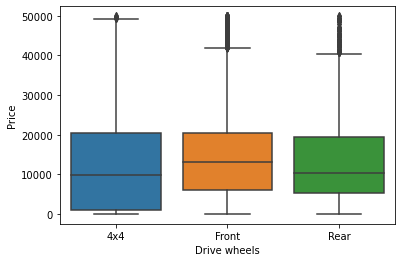

In [85]:
sns.boxplot(x = df2["Drive wheels"], y = df2["Price"])

<AxesSubplot:xlabel='Wheel', ylabel='Price'>

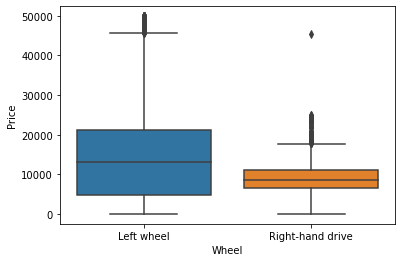

In [86]:
sns.boxplot(x = df2["Wheel"], y = df2["Price"])

In [87]:
df2.drop(index = df2[(df2.Wheel == "Right-hand drive") & (df2.Price>30000)].index, axis = 0, inplace = True)
df2.shape

(17915, 18)

<AxesSubplot:xlabel='Airbags', ylabel='Price'>

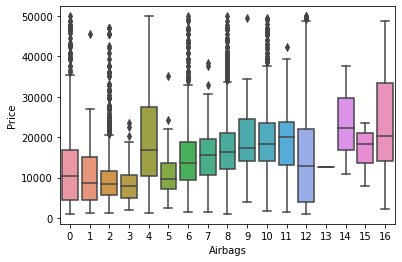

In [260]:
sns.boxplot(x = df2["Airbags"], y = df2["Price"])

In [88]:
df2.drop(index = df2[((df2.Airbags == 1)|(df2.Airbags == 5) |(df2.Airbags == 7)|(df2.Airbags == 9))& (df2.Price>34000)].index, axis = 0, inplace = True)
df2.shape

(17911, 18)

<AxesSubplot:xlabel='Engine volume', ylabel='Price'>

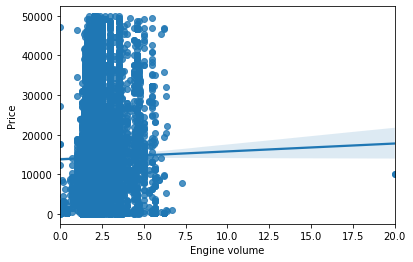

In [89]:
sns.regplot(x = df2["Engine volume"], y = df2["Price"])

# Important for test set

In [92]:
df2 = df2[df2["Engine volume"]<8]

E_V = []

for EV in df2["Engine volume"]:
    if EV > 5.0:
        E_V.append(5.0)
    else:
        E_V.append(EV)

df2.drop(columns = "Engine volume", inplace = True)
df2["Engine volume"] = E_V
df2.shape
        
        


(17909, 18)

<AxesSubplot:xlabel='Engine volume', ylabel='Price'>

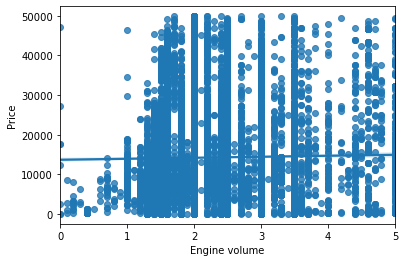

In [93]:
sns.regplot(x = df2["Engine volume"], y = df2["Price"])

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

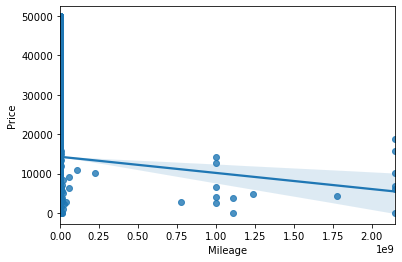

In [94]:
sns.regplot(x = df2["Mileage"], y = df2["Price"])

# COnsidering to drop Mileage

In [97]:
mil = []

for m in df2["Mileage"]:
    if(m==0):
        m.append(5)
    else if(m<0.5):
        m.append(4)
    else if(m<1.1):
        m.append(3)
    else if(m<1.5):
        m.append(2)
    else:
        m.append(1)
        
#df2.drop(columns = "Mileage", inplace = True)
#df2["Mileage"]

SyntaxError: invalid syntax (<ipython-input-97-cbab02f8b090>, line 6)

<AxesSubplot:xlabel='Turbo', ylabel='Price'>

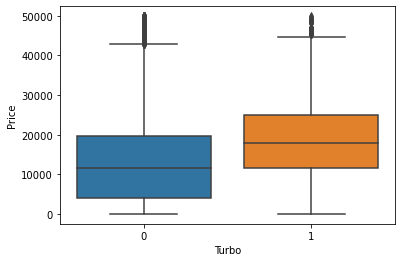

In [95]:
sns.boxplot(x = df2["Turbo"], y = df2["Price"])

<AxesSubplot:xlabel='Color', ylabel='Price'>

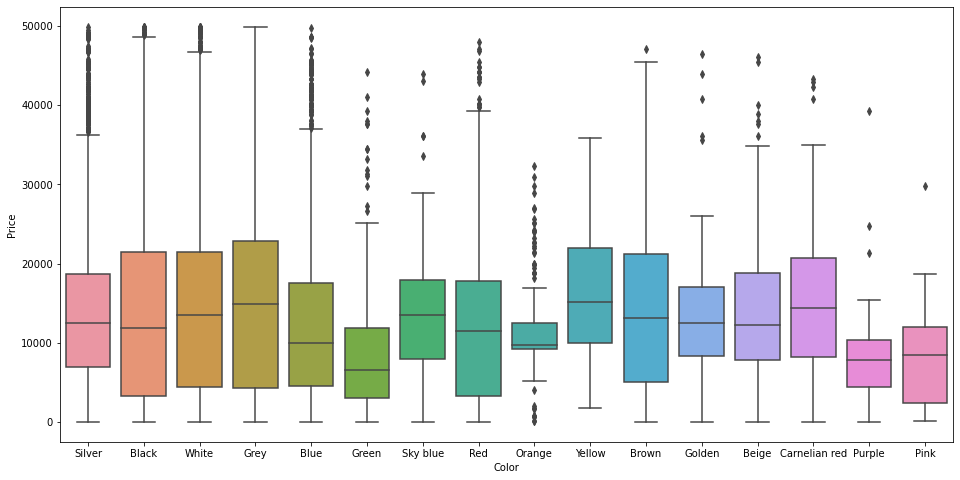

In [99]:
plt.figure(figsize = (16,8))
sns.boxplot(x = df2["Color"], y = df2["Price"])

C:\Ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

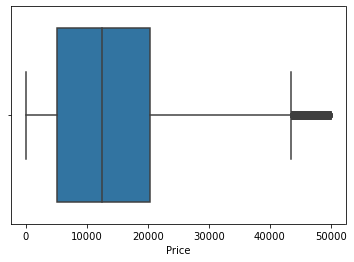

In [102]:
temp = df2[df2.Mileage!=0]
sns.boxplot(temp["Price"])


In [103]:
df2.drop(columns = "Mileage", inplace = True)

# Dropping low prices

In [113]:
df2 = df2[df2["Price"]>1000]

In [104]:
df2.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Cylinders,Engine volume
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,Automatic,4x4,04-May,Left wheel,Silver,12,0,4.0,3.5
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,Tiptronic,4x4,04-May,Left wheel,Black,8,0,4.0,3.0
2,8467,779.0,HONDA,FIT,2006,Hatchback,No,Petrol,Variator,Front,04-May,Right-hand drive,Black,2,0,4.0,1.3
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,Automatic,4x4,04-May,Left wheel,White,0,0,4.0,2.5
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,Automatic,Front,04-May,Left wheel,Silver,4,0,4.0,1.3


In [13]:
categ_variables = ["Model", "Color", "Manufacturer", "Category", "Fuel type", "Gear box type", "Drive wheels", "Doors", "Wheel"]
one_hot_categ = ["Category", "Fuel type", "Gear box type", "Drive wheels", "Doors", "Wheel"]
target_categ = ["Model","Color","Manufacturer"]


In [14]:
df4, tar_enc_dict = target_encoding(df2, target_categ)
df4 = OneHot_encoding(df4, one_hot_categ)
df4 = LI(df4)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_log_error, r2_score

In [16]:
model1 = LinearRegression()
model2 = BayesianRidge()
model3 = RandomForestRegressor()
model4 = SVR()

In [17]:
df5 = df4
X = df5.drop(columns = "Price", axis = 1)
Y = df5["Price"].astype('float64')

Y = np.array(Y)
Y = Y.reshape((-1,1))

### Standard Scaler

In [18]:
#df5 = df4.drop(columns = ["Cylinders", "Drive wheels_enc"], axis=1)


scaler = StandardScaler()
scaler2 = StandardScaler()

y = scaler2.fit_transform(Y)


x = scaler.fit_transform(X)
################################################ CHECK FOR yyyyyyyyyyyyyyyyyy
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75, random_state = 7)

model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
train_pred = model3.predict(x_train)

y_pred = scaler2.inverse_transform(y_pred)
train_pred = scaler2.inverse_transform(train_pred)
y_test = scaler2.inverse_transform(y_test)
y_train = scaler2.inverse_transform(y_train)


test_error = np.sqrt(mean_squared_log_error(y_pred, y_test))
train_error = np.sqrt(mean_squared_log_error(train_pred, y_train))
print(r2_score(y_pred, y_test))
print("\n")
print("Test set error: ", test_error)
print("Train set error: ", train_error)


<ipython-input-18-64d9b3f1552d>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(x_train, y_train)


0.7179405203043483


Test set error:  0.9912899481471067
Train set error:  0.7535412380314755


C:\Ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 14334.05 and sigma = 11759.18



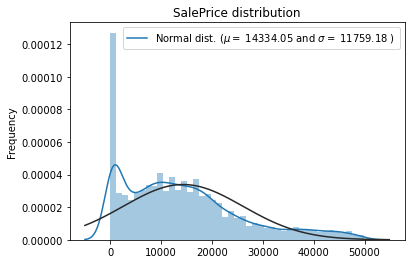

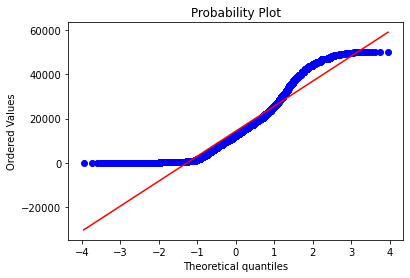

Skewness: 0.905281
Kurtosis: 0.297117


In [19]:
from scipy.stats import norm
from scipy.stats import skew
from scipy import stats
# Plot Histogram
Y = Y.reshape((-1,))
sns.distplot(Y , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(Y, plot=plt)
plt.show()

Y = pd.DataFrame(Y)
print("Skewness: %f" % Y.skew())
print("Kurtosis: %f" % Y.kurt())

C:\Ana\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 9.90 and sigma = 2.98



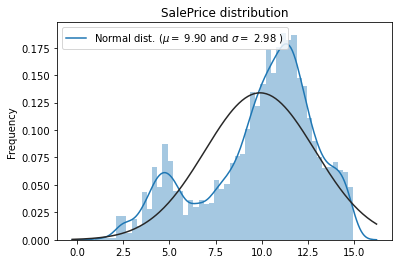

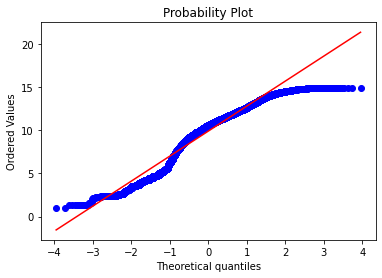

Skewness: -0.696521
Kurtosis: -0.256001


In [28]:
Y = df5["Price"].astype('float64')

Y = np.array(Y)
Y = Y.reshape((-1,1))

Y = np.power(Y, 0.25)
Y = np.array(Y)
Y = Y.reshape((-1,))
#Check the new distribution 
sns.distplot(Y , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(Y, plot=plt)
plt.show()
Y = pd.DataFrame(Y)
print("Skewness: %f" % Y.skew())
print("Kurtosis: %f" % Y.kurt())

In [124]:
scaler = StandardScaler()
scaler2 = StandardScaler()

y = scaler2.fit_transform(Y)


x = scaler.fit_transform(X)
################################################ CHECK FOR yyyyyyyyyyyyyyyyyy
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75, random_state = 7)

model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
train_pred = model3.predict(x_train)


y_pred = scaler2.inverse_transform(y_pred)
train_pred = scaler2.inverse_transform(train_pred)
y_test = scaler2.inverse_transform(y_test)
y_train = scaler2.inverse_transform(y_train)
train_pred = np.expm1(train_pred)
y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)
y_train = np.expm1(y_train)


test_error = np.sqrt(mean_squared_log_error(y_pred, y_test))
train_error = np.sqrt(mean_squared_log_error(train_pred, y_train))
print(r2_score(y_pred, y_test))
print("\n")
print("Test set error: ", test_error)
print("Train set error: ", train_error)


<ipython-input-124-2315aad57c4d>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(x_train, y_train)


0.7092357901219781


Test set error:  0.3910412350469913
Train set error:  0.2118935580607073


C:\Ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

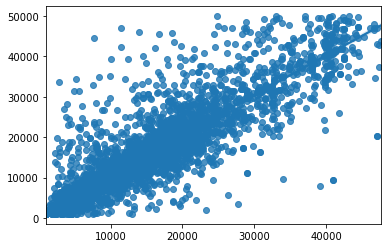

In [125]:
sns.regplot(y_pred, y_test)

C:\Ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

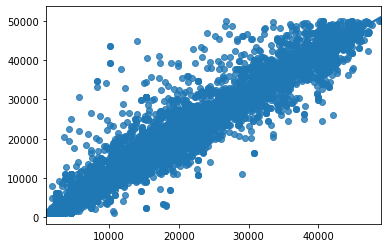

In [126]:
sns.regplot(train_pred, y_train)

In [132]:
test = pd.read_csv("test.csv")
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [133]:
test = Eng_Vol2(test)
test = mileage(test)
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Engine volume,Turbo,Mileage
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN,2.0,1,0
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN,2.4,0,26000
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN,1.5,0,168000
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN,3.2,0,143000
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,4,Manual,Front,04-May,Left wheel,Black,0,NaN,1.6,0,200000


In [134]:
test.drop(columns = "ID", inplace = True)
test["Levy"].replace(to_replace='-', value = np.nan, inplace = True)
test["Levy"] = pd.to_numeric(test["Levy"])
test["Levy"].fillna(Levy_median, inplace = True )

test.describe()

,Levy,Prod. year,Cylinders,Airbags,Price,Engine volume,Turbo,Mileage
count,8245.000000,8245.000000,8245.000000,8245.000000,0.0,8245.000000,8245.000000,8.245000e+03
mean,876.530382,2010.911583,4.618799,6.519102,NaN,2.325045,0.100424,1.318247e+06
std,375.548134,5.548762,1.817581,4.350323,NaN,0.889286,0.300583,4.776089e+07
min,87.000000,1943.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000e+00
25%,730.000000,2009.000000,4.000000,4.000000,NaN,1.800000,0.000000,7.155100e+04
50%,779.000000,2012.000000,4.000000,6.000000,NaN,2.000000,0.000000,1.276750e+05
75%,919.000000,2014.000000,4.000000,12.000000,NaN,2.500000,0.000000,1.920000e+05
max,7528.000000,2020.000000,127.000000,16.000000,NaN,10.800000,1.000000,2.147484e+09


In [135]:
#test = test[test["Levy"]<6000]
#df2 = df2[df2["Levy"]>250]

levy = []
#levy_max = df2.Levy.mean() + (3* df2.Levy.std())
#levy_min = df2.Levy.mean()  (3* df2.Levy.std())
for l in test["Levy"]:
    if l>2000:
        levy.append(levy_max)
    else:
        levy.append(l)
        
test.drop(columns = "Levy", inplace = True)
test["Levy"] = levy
test.shape

(8245, 18)

In [155]:
cylinders = []
for cyl in test["Cylinders"]:
    if ((cyl == 7.0) | (cyl==9.0) | (cyl>12.0)):
        cylinders.append(cyl_median)
    else:
        cylinders.append(cyl_median)

test.drop(columns = "Cylinders", inplace = True)
test["Cylinders"] = cylinders

In [156]:
E_V = []

for EV in test["Engine volume"]:
    if EV > 5.0:
        E_V.append(5.0)
    else:
        E_V.append(EV)

test.drop(columns = "Engine volume", inplace = True)
test["Engine volume"] = E_V
test.shape

(8245, 18)

In [157]:
#Dropping Mileage

test.drop(columns = "Mileage", inplace = True)

In [158]:
t = test
for var in target_categ:
    #encodings = df4.groupby(var)['Price'].median().reset_index()
    t = t.merge(tar_enc_dict[var], how='left', on=var)
    t.drop(var, axis=1, inplace=True)
    t.rename(columns = {"Price_y": var + "_enc", "Price_x": "Price"}, inplace = True) 

t = OneHot_encoding(t, one_hot_categ)
#For Leather Interiors
t["Leather interior"].replace({"Yes":1, "No":0}, inplace = True)
t.drop(columns = "Price", inplace = True)
t.head()

,Prod. year,Leather interior,Airbags,Turbo,Levy,Cylinders,Engine volume,Model_enc,Color_enc,Manufacturer_enc,...,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive
0,2012,0,10,1,779.0,4.0,2.0,4704.0,17249.0,12544.0,...,0,0,0,1,0,1,0,0,1,0
1,2012,1,10,0,779.0,4.0,2.4,12544.0,17249.0,18240.0,...,1,0,0,1,0,0,1,0,1,0
2,2005,0,8,0,779.0,4.0,1.5,8467.0,13900.0,8781.0,...,0,0,0,1,0,0,1,0,0,1
3,2012,1,12,0,975.0,4.0,3.2,15056.0,11290.0,9100.0,...,0,0,1,0,0,0,1,0,1,0
4,1993,0,0,0,779.0,4.0,1.6,6586.0,15053.0,6586.0,...,0,0,0,1,0,0,1,0,1,0


In [159]:
model_med = tar_enc_dict["Model"]["Price"].median()
manufac_med = tar_enc_dict["Manufacturer"]["Price"].median()
t["Model_enc"] = t["Model_enc"].fillna(model_med)
t["Manufacturer_enc"] = t["Manufacturer_enc"].fillna(manufac_med)

In [160]:
t.isnull().sum()

Prod. year                  0
Leather interior            0
Airbags                     0
Turbo                       0
Levy                        0
Cylinders                   0
Engine volume               0
Model_enc                   0
Color_enc                   0
Manufacturer_enc            0
Category_Cabriolet          0
Category_Coupe              0
Category_Goods wagon        0
Category_Hatchback          0
Category_Jeep               0
Category_Limousine          0
Category_Microbus           0
Category_Minivan            0
Category_Pickup             0
Category_Sedan              0
Category_Universal          0
Fuel type_CNG               0
Fuel type_Diesel            0
Fuel type_Hybrid            0
Fuel type_Hydrogen          0
Fuel type_LPG               0
Fuel type_Petrol            0
Fuel type_Plug-in Hybrid    0
Gear box type_Automatic     0
Gear box type_Manual        0
Gear box type_Tiptronic     0
Gear box type_Variator      0
Drive wheels_4x4            0
Drive whee

In [162]:
x_t = scaler.transform(t)
y_t = model3.predict(x_t)
y_p = y_t.reshape((-1,1))
y_p = scaler2.inverse_transform(y_p)
y_p = np.expm1(y_p)
y_p = pd.DataFrame(y_p)

In [163]:
y_p

,0
0,2811.385753
1,7077.262447
2,5266.613810
3,6290.002675
4,3873.892570
...,...
8240,4640.418305
8241,7290.681887
8242,25217.775544
8243,4431.430488


In [164]:
y_p.to_csv("submission7.csv", header = ["Price"], index = False)

In [228]:
test[test["Cylinders"]>12]

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Engine volume,Turbo,Mileage
2689,702.0,CHEVROLET,Captiva,2014,Jeep,Yes,Diesel,127,Automatic,Front,04-May,Left wheel,White,4,NaN,2.2,0,49643
6021,562.0,VOLKSWAGEN,Jetta,2015,Sedan,No,Petrol,15,Automatic,Front,04-May,Left wheel,White,10,NaN,1.4,1,23000


In [72]:
#df5 = df4.drop(columns = ["Cylinders", "Drive wheels_enc"], axis=1)
df5 = df4
Y = df5["Price"].astype('float64')
X = df5.drop(columns = "Price", axis = 1)

RS = RobustScaler()
RS2 = RobustScaler()
Y = np.array(Y)
Y = Y.reshape((-1,1))
y = RS2.fit_transform(Y)


RS.fit(X)
x = RS.transform(X)

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75, random_state = 7)

model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
train_pred = model3.predict(x_train)

y_pred = y_pred.reshape((-1,1))
y_pred = RS2.inverse_transform(y_pred)
train_pred = train_pred.reshape((-1,1))
train_pred = RS2.inverse_transform(train_pred)
y_test = RS2.inverse_transform(y_test)
y_train = RS2.inverse_transform(y_train)


test_error = np.sqrt(mean_squared_log_error(y_pred, y_test))
train_error = np.sqrt(mean_squared_log_error(train_pred, y_train))
print(r2_score(y_pred, y_test))
print("\n")
print("Test set error: ", test_error)
print("Train set error: ", train_error)


<ipython-input-72-35995b1b106f>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(x_train, y_train)


0.7434069484788599


Test set error:  0.5384973939093521
Train set error:  0.3241850947424971


In [32]:
x_t = RS.transform(t)
y_t = model3.predict(x_t)
y_p = y_t.reshape((-1,1))
y_p = RS2.inverse_transform(y_p)
y_p = pd.DataFrame(y_p)

In [33]:
y_p

,0
0,2.349182e+08
1,2.121075e+08
2,1.303049e+08
3,5.726618e+07
4,7.888170e+07
...,...
8240,1.757886e+08
8241,3.039907e+08
8242,8.687230e+06
8243,6.789486e+08
